<center><font size=8>Hands-on - Introduction to Neural Networks</font></center>

## Data Description

- The MNIST (Modified National Institute of Standards and Technology) dataset is one of the most popular datasets used in machine learning and deep learning

- It contains 70,000 handwritten images of the digits from 0 to 9

- Each image is of 28x28 dimension and is represented using pixels values between 0 and 255, where
    - 0 stands for black
    - 255 stands for white

## Installing and importing the necessary libraries

In [10]:
import pandas as pd  # Library for data manipulation and analysis.
import numpy as np   # Fundamental package for scientific computing.
import matplotlib.pyplot as plt  # Plotting library for creating visualizations.
import seaborn as sns #For advanced visualizations.

from sklearn.model_selection import train_test_split  # Function for splitting datasets for training and testing.

import time  # Module for time-related operations.

import tensorflow as tf #An end-to-end open source machine learning platform
from tensorflow import keras  # High-level neural networks API for deep learning.
from keras import backend   # Abstraction layer for neural network backend engines.
from keras.models import Sequential  # Model for building NN sequentially.
from keras.layers import Dense   # for creating fully connected neural network layers.

import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

In [11]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
keras.utils.set_random_seed(812)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it might affect the overall performance
tf.config.experimental.enable_op_determinism()

## Loading the data

In [12]:
#Loading the dataset from tensorflow datasets.
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

## Data Overview

In [13]:
#Printing the shape of the data.
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


**Let's check the images for different digits.**

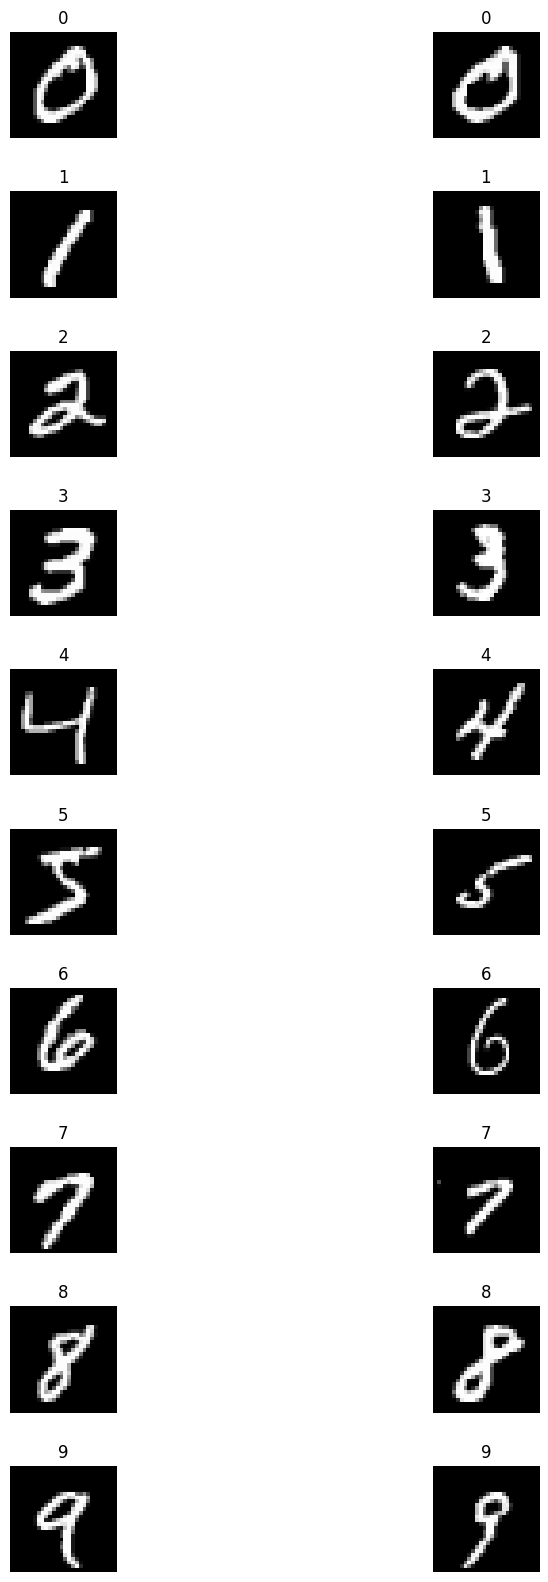

In [14]:
f, axarr = plt.subplots(10,2,figsize=(10, 20)) #Grid of size 10*20, with 10 rows and 2 columns
for i in range(10): #For each digit
    images = x_train[y_train==i] #Filtering all the images based on the digit.
    axarr[i,0].imshow(images[0],cmap="gray") #Plotting the first one.
    axarr[i,1].imshow(images[1],cmap="gray") #Plotting the second one.
    axarr[i,0].axis('off')  # Hide axes
    axarr[i,1].axis('off')  # Hide axes
    axarr[i,0].set_title(str(i)) #Setting the title as the label of the digit.
    axarr[i,1].set_title(str(i)) #Setting the title as the label of the digit.

plt.subplots_adjust(hspace=0.5)  # Adjust spacing between subplots
plt.show() #Displaying the plot.

**Let's check the distribution of images across different classes.**

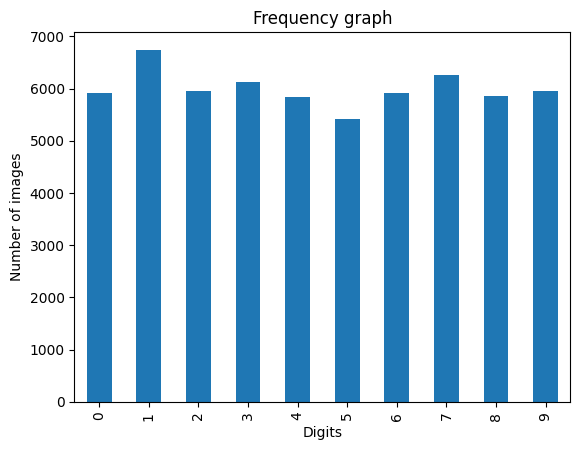

In [15]:
# frequency plot of the dependent variable in the training dataset
(pd.Series(y_train).value_counts())[[0,1,2,3,4,5,6,7,8,9]].plot.bar()
plt.title("Frequency graph") #Setting the title
plt.xlabel("Digits") #Defining the label for the x-axis
plt.ylabel("Number of images") #Defining the label for the y-axis.
plt.show() #Displaying the plot.

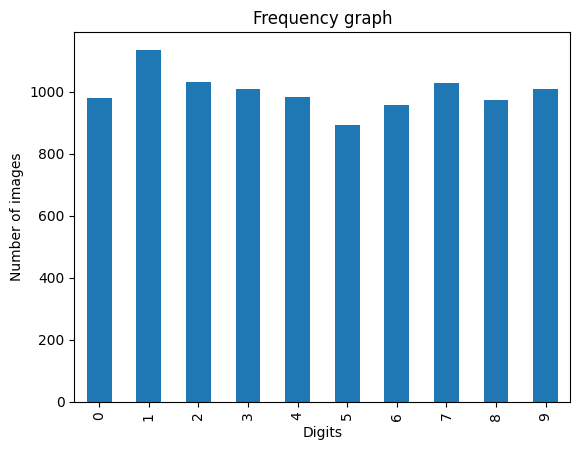

In [16]:
# frequency plot of the dependent variable in the test dataset
(pd.Series(y_test).value_counts())[[0,1,2,3,4,5,6,7,8,9]].plot.bar()
plt.title("Frequency graph") #Setting the title
plt.xlabel("Digits") #Defining the label for the x-axis
plt.ylabel("Number of images") #Defining the label for the y-axis.
plt.show() #Displaying the plot.

## Data Preprocessing

### Data Preparation for Modeling

In [17]:
# Splitting the training dataset in the ratio 5:1 for train and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=1-(5/6), random_state=42,stratify=y_train)

In [18]:
#Printing the shape of the dataset.
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(50000, 28, 28)
(50000,)
(10000, 28, 28)
(10000,)


### Data Scaling

In [19]:
#Printing the maximum value and the minimum value of the independent variable.
print(x_train.max(),x_test.max(),x_val.max())
print(x_train.min(),x_test.min(),x_val.min())

255 255 255
0 0 0


In [20]:
# Normalizing the dataset
x_train, x_val, x_test = x_train.astype("float32")/(255), x_val.astype("float32")/(255), x_test.astype("float32")/(255)

In [21]:
#Printing the maximum value and the minimum value of the independent variable.
print(x_train.max(),x_test.max(),x_val.max())
print(x_train.min(),x_test.min(),x_val.min())

1.0 1.0 1.0
0.0 0.0 0.0


- Previously, the range was $[0,255]$
- Now, the range after normalizing is $[0,1]$

### Reshaping the input

We need to reshape the image data from $(n,h,w)$ to $(n,h*w)$, where

- $n$ = number of images in the dataset
- $h$ = height of the image
- $w$ = width of the image

For example, image data of dimension $(50000,28,28)$ is transformed to $(50000,28*28)$, i.e., $(50000,784)$.

In [22]:
#Reshaping the image data
x_train = x_train.reshape(x_train.shape[0],-1)
x_val = x_val.reshape(x_val.shape[0],-1)
x_test = x_test.reshape(x_test.shape[0],-1)

In [23]:
print(x_train.shape[0], "train samples")
print(x_val.shape[0], "validation samples")
print(x_test.shape[0], "test samples")

50000 train samples
10000 validation samples
10000 test samples


### Encoding the target variable

In [24]:
# specifying the number of classes
num_classes = 10

In [25]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

In [26]:
#Displaying the updated class labels
y_train

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

- Each row in the matrix is now a one-hot encoded vector of 10 dimensions
- The value will be 1 for the entry (dimension) corresponding true class and 0 elsewhere

### Utility functions

In [27]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

We'll create a dataframe to store the results from all the models we build

In [28]:
#Defining the columns of the dataframe which are nothing but the hyper parameters and the metrics.
columns = ["# hidden layers","# neurons - hidden layer","activation function - hidden layer","# epochs","batch size","train loss","validation loss","train accuracy","validation accuracy","time (secs)"]

#Creating a pandas dataframe.
results = pd.DataFrame(columns=columns)

## Model Building

### Model 0

- Let's start with a baseline model having an input layer, an output layer, and no hidden layers.
- We'll use vanilla Gradient Descent as the optimizer.
- We'll set epochs to 10, which means the model will pass over the entire data 10 times

In [29]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [30]:
# initializing the neural network
model = Sequential()

# Adding a dense layer with softmax activation function, with the input dimension determined by the shape of the training data.
model.add(Dense(num_classes, activation = 'softmax', input_dim = x_train.shape[1]))

Let's go over the arguments of the function used above:

- `num_classes`:  Positive integer, dimensionality of the output vector. In this case, it is 10.

- `activation`: Activation function to use. If nothing is specified, no activation is applied (i.e., "linear" activation: $a(x) = x$).

- `input_dim`: Positive integer, dimensionality of the input vector. In this case, it is 784.

**Note**: We do not have to explicitly add an input layer. Once we initialize a neural network using `Sequential()`, it automatically assigns a default input layer. We just define an output layer and connect it to the predefined input layer.

In [31]:
#Printing the summary.
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

- `Layer (type): dense (Dense)`
    - Defines the type of neural network layer
    - Dense Layer is a simple layer of neurons in which each neuron receives input from all the neurons of previous layer (hence, the name dense)

- `Output shape: (None, 10)`
    - `None`: It indicates that this dimension is variable. If a number is specified, it indicates the batch size or the number of input vectors.
    - `10`: Number of neurons outputted by the layer
  
- `Param #: 7850`
    - Denotes the total number of parameters in the layer
    - The number of parameters is calculated as follows:
        - Input shape: (None, 784)
        - Output shape: (None, 10)
        - Each of the 784 neurons from the input is connected to each of the 10 neurons in the output. This gives us a total of 784*10, i.e., 7840 weight parameters
        - For each neuron in the output, there is a bias parameter assosciated, which gives us 10 bias parameters
        - Thus , the total number of parameters is 7840 + 10 = 7850

- Trainable parameters are weights and biases adjusted during training to improve model performance

- Non-trainable parameters, like hyperparameters or fixed operation parameters, remain unchanged and contribute to the model's architecture

- The current model has all trainable parameters

- Each parameter occupies some memory space. The total space occupied by the model parameters here is ~31KB

In [32]:
#Compiling the model.
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [33]:
batch_size = x_train.shape[0]
epochs = 10

# time.time() returns the time in seconds since Thu Jan 1 00:00:00 1970.
start = time.time()

# Fitting the model.
history = model.fit(
    x_train, y_train,
    validation_data=(x_val,y_val),
    batch_size=batch_size,
    epochs=epochs
)

# time.time() returns the time in seconds since Thu Jan 1 00:00:00 1970.
end = time.time()

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - accuracy: 0.0933 - loss: 2.3785 - val_accuracy: 0.1019 - val_loss: 2.3576
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.0996 - loss: 2.3633 - val_accuracy: 0.1081 - val_loss: 2.3429
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.1053 - loss: 2.3485 - val_accuracy: 0.1159 - val_loss: 2.3286
Epoch 4/10


2025-04-06 16:59:24.231445: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-04-06 16:59:24.231720: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.1115 - loss: 2.3342 - val_accuracy: 0.1224 - val_loss: 2.3148
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.1180 - loss: 2.3203 - val_accuracy: 0.1286 - val_loss: 2.3014
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.1244 - loss: 2.3068 - val_accuracy: 0.1342 - val_loss: 2.2882
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.1313 - loss: 2.2936 - val_accuracy: 0.1408 - val_loss: 2.2755
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.1380 - loss: 2.2807 - val_accuracy: 0.1480 - val_loss: 2.2630
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.1455 - loss: 2.2682 - val_accuracy: 0.1554 - val_loss: 2.2508
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.1527 - loss: 2.2559 - val_accuracy: 0.1628 - val_loss: 2.2388


In [34]:
print("Time taken in seconds ",end-start)

Time taken in seconds  0.857367992401123


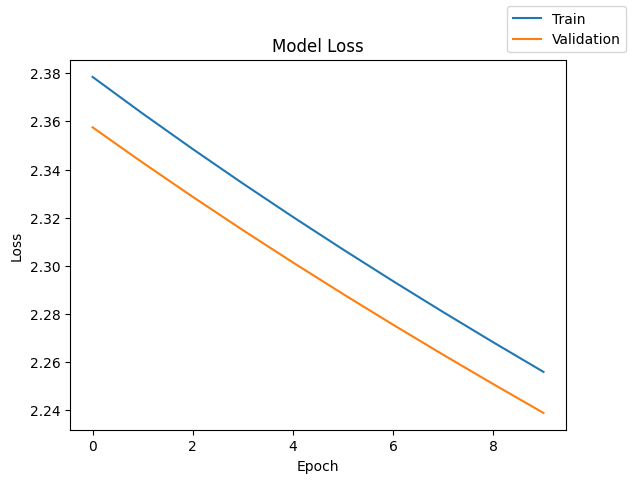

In [35]:
plot(history,'loss')

- Both train and validation loss are decreasing linearly.

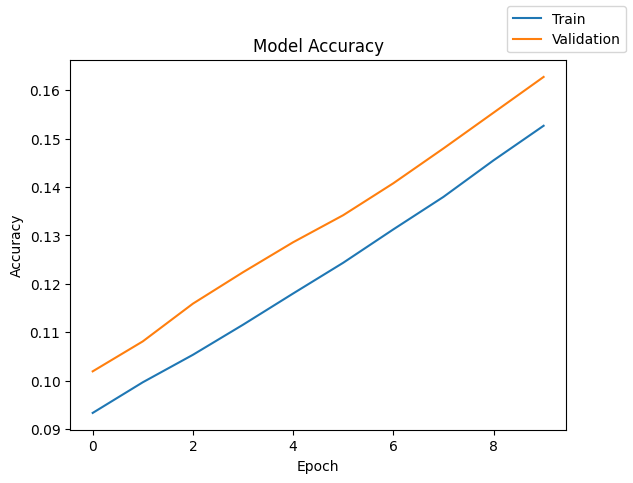

In [36]:
plot(history,'accuracy')

- As accuracy is inversely proportional to the loss, the graph is linearly increasing.

In [37]:
results.loc[0] = [0,'-','-',10,50000,history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,0,-,-,10,50000,2.255868,2.238811,0.1527,0.1628,0.86


- With the baseline model and 10 epochs, we were able to obtain an accuracy of 15%, which is very low

- ***How do we improve the performance?***

- We can allow the model to **run over the data more times**. This can be done by **increasing the number of epochs**.

- Let's try this out.

### Model 1

In [38]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [39]:
#Initializing the neural network
model = Sequential()
model.add(Dense(num_classes, activation = 'softmax', input_dim = x_train.shape[1]))

In [40]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
batch_size = x_train.shape[0]
epochs = 50
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [42]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end = time.time()

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - accuracy: 0.0724 - loss: 2.4184 - val_accuracy: 0.0749 - val_loss: 2.4064
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.0750 - loss: 2.4036 - val_accuracy: 0.0784 - val_loss: 2.3921
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.0777 - loss: 2.3893 - val_accuracy: 0.0819 - val_loss: 2.3783
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.0804 - loss: 2.3754 - val_accuracy: 0.0847 - val_loss: 2.3649
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.0844 - loss: 2.3619 - val_accuracy: 0.0879 - val_loss: 2.3518
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.0879 - loss: 2.3487 - val_accuracy: 0.0912 - val_loss: 2.3390
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.0916 - loss: 2.3359 - val_accuracy: 0.0951 - val_loss: 2.3265
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.0961 - loss: 2.3234 - val_accuracy: 0.1005 - val_loss: 2.3143

In [43]:
print("Time taken in seconds ",end-start)

Time taken in seconds  3.329374313354492


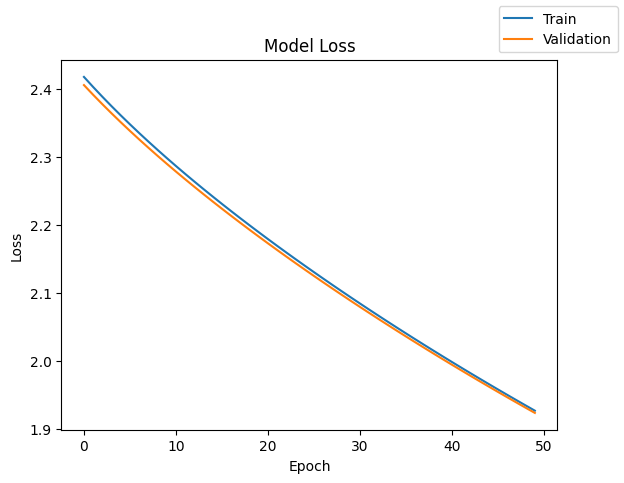

In [44]:
plot(history,'loss')

- The apparently linear relationship between epochs and loss (as seen before) is slowly becoming non-linear now
    - We see a slight curvature in the plot here

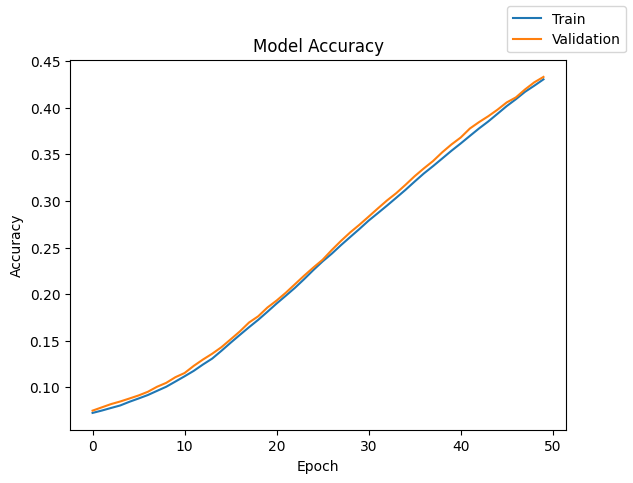

In [45]:
plot(history,'accuracy')

- The non-linear relationship is more clearly visible here than before
- Note that the train accuracy (orange curve) remains below or equal to the validation accuracy (blue curve)

In [46]:
results.loc[1]= [0,'-','-',50,50000,history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [47]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,0,-,-,10,50000,2.255868,2.238811,0.1527,0.1628,0.86
1,0,-,-,50,50000,1.927448,1.924149,0.4306,0.4332,3.33


- The accuracy has improved significantly compared to the previous model (~180%)
- The time taken to train has also increased.
- It is important to note that since we are using **vanilla Gradient Descent**, the **model parameters are updated once every epoch**
- We can use Stochastic Gradient Descent to update the model parameters more frequently in a single epoch
- Let's try this out



### Model 2

In [48]:
#clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [49]:
#Initializing the neural network
model = Sequential()
model.add(Dense(num_classes, activation = 'softmax', input_dim = x_train.shape[1]))

In [50]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
batch_size = 32
epochs = 10
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [52]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end = time.time()

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 358us/step - accuracy: 0.6999 - loss: 1.2034 - val_accuracy: 0.8657 - val_loss: 0.5347
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 318us/step - accuracy: 0.8758 - loss: 0.4950 - val_accuracy: 0.8815 - val_loss: 0.4438
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.8891 - loss: 0.4213 - val_accuracy: 0.8886 - val_loss: 0.4066
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 319us/step - accuracy: 0.8956 - loss: 0.3877 - val_accuracy: 0.8949 - val_loss: 0.3852
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 317us/step - accuracy: 0.9007 - loss: 0.3674 - val_accuracy: 0.8986 - val_loss: 0.3709
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.9033 - loss: 0.3533 - val_accuracy: 0.9011 - val_loss: 0.3604
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 317us/step - accuracy: 0.9045 - loss: 0.3429 - val_accuracy: 0.9029 - val_loss: 0.3524
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 317us/step - accuracy: 0.9067 -

- The accuracy has improved by a significant margin.
- Note that after one epoch, we got an accuracy of 80%.
    - As we updated the model parameters more frequently (50000/32 = 1563 times) in a single epoch, our model was able to adjust to the data better
    - It took the same amount of time (~4s) for one epoch here vs 10 epochs previously. But the performance gain is much higher
    - This shows that the rate of learning from the data has improved

In [53]:
print("Time taken in seconds ",end-start)

Time taken in seconds  5.245950937271118


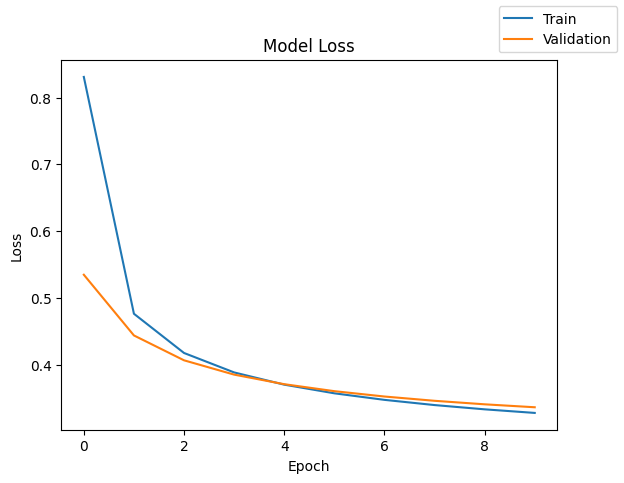

In [54]:
plot(history,'loss')

- Until the 4th epoch, the validation loss is lesser than or equal to the train loss.

- After the 4th epoch, the validation loss is higher than the train loss.

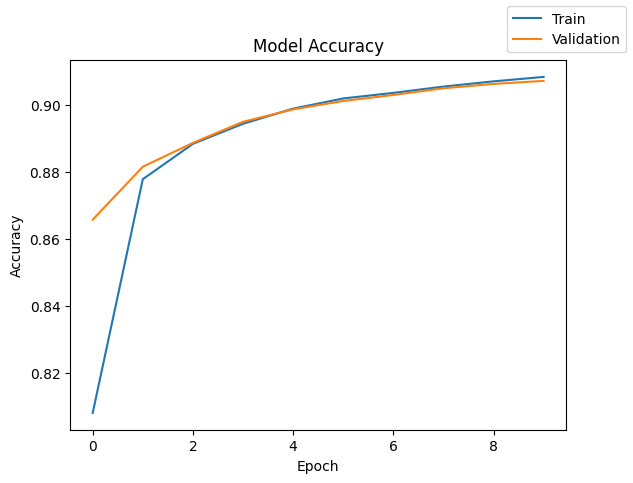

In [55]:
plot(history,'accuracy')

- Here, after the 4th epoch, validation accuracy is lesser than or equal to the train accuracy.

**The divergence between the train and validation accuracies may hint that the model is slowly moving towards being an overfit model.**

In [56]:
results.loc[2] = [0,'-','-',10,32,history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [57]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,0,-,-,10,50000,2.255868,2.238811,0.15270,0.1628,0.86
1,0,-,-,50,50000,1.927448,1.924149,0.43060,0.4332,3.33
2,0,-,-,10,32,0.327848,0.336322,0.90828,0.9071,5.25


- It is clear that using a smaller batch size improves the rate of learning.
    - We saw an ~100% improvement here

- Now, let's keep the batch size the same and increase the epochs to 50
   - We saw previously that more epochs result in more updates. So, we can expect an increase in accuracy.

### Model 3

In [58]:
#clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [59]:
#Initializing the neural network
model = Sequential()
model.add(Dense(num_classes, activation = 'softmax', input_dim = x_train.shape[1]))

In [60]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
batch_size = 32
epochs = 50
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [62]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end = time.time()

Epoch 1/50
 342/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - accuracy: 0.4745 - loss: 1.8244

2025-04-06 16:59:34.110706: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-04-06 16:59:34.110995: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 366us/step - accuracy: 0.6984 - loss: 1.2107 - val_accuracy: 0.8658 - val_loss: 0.5356
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 321us/step - accuracy: 0.8756 - loss: 0.4956 - val_accuracy: 0.8823 - val_loss: 0.4446
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.8887 - loss: 0.4220 - val_accuracy: 0.8904 - val_loss: 0.4070
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 320us/step - accuracy: 0.8952 - loss: 0.3882 - val_accuracy: 0.8953 - val_loss: 0.3853
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 318us/step - accuracy: 0.8997 - loss: 0.3677 - val_accuracy: 0.8997 - val_loss: 0.3708
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 332us/step - accuracy: 0.9033 - loss: 0.3536 - val_accuracy: 0.9017 - val_loss: 0.3603
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 330us/step - accuracy: 0.9057 - loss: 0.3431 - val_accuracy: 0.9034 - val_loss: 0.3522
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 333us/step - accuracy: 0.9074 - loss: 0.33

In [63]:
print("Time taken in seconds ",end-start)

Time taken in seconds  25.280290126800537


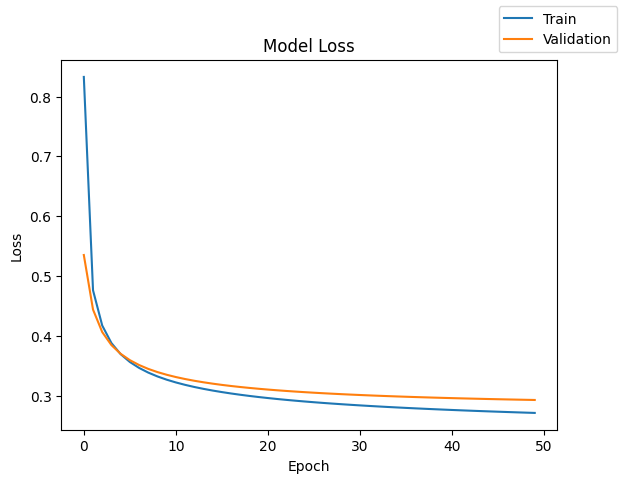

In [64]:
plot(history,'loss')

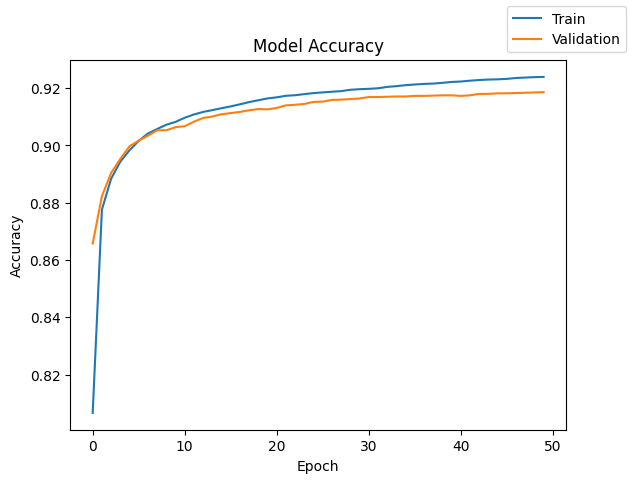

In [65]:
plot(history,'accuracy')

- As seen previously, the train and validation losses (and accuracies) start to diverge after a few epochs
    - Here, it is ~5 epochs

- Also, after a point (somewhere between 20 and 30 epochs), the train and validation losses (and accuracies) start to plateau and show minimal change
    - This indicates that we might choose to not train the neural network beyond certain number of epochs as the performance gain might not be high

In [66]:
results.loc[3] = [0,'-','-',50,32,history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [67]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,0,-,-,10,50000,2.255868,2.238811,0.15270,0.1628,0.86
1,0,-,-,50,50000,1.927448,1.924149,0.43060,0.4332,3.33
2,0,-,-,10,32,0.327848,0.336322,0.90828,0.9071,5.25
3,0,-,-,50,32,0.272220,0.293814,0.92392,0.9186,25.28


- We can see some improvement in the overall accuracy, but it's not as great an improvement as we saw previously

- In fact, we took 5 times more time for a 2% accuracy gain

**Note**: This tradeoff may be feasible in certain cases but not in others. For example, in case of real-time predictions, one can choose to sacrifice a small performance gain for a much reduced prediction time.

- We saw that training longer doesn't really lead to a larger improvement in model performance
- Since we had a batch size of 32, the model parameters update was based on only these 32 samples
- ***What if we increase the number of samples based on which the updates are made?***
- Let's try increasing the batch size to 64.

### Model 4

In [68]:
#clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [69]:
#Initializing the neural network
model = Sequential()
model.add(Dense(num_classes, activation = 'softmax', input_dim = x_train.shape[1]))

In [70]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [71]:
batch_size = 64
epochs = 50
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [72]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end = time.time()

Epoch 1/50
299/782 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - accuracy: 0.4629 - loss: 1.8203

2025-04-06 16:59:59.583231: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-04-06 16:59:59.583706: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - accuracy: 0.6163 - loss: 1.4532 - val_accuracy: 0.8433 - val_loss: 0.6841
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - accuracy: 0.8547 - loss: 0.6257 - val_accuracy: 0.8665 - val_loss: 0.5383
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - accuracy: 0.8726 - loss: 0.5100 - val_accuracy: 0.8764 - val_loss: 0.4795
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - accuracy: 0.8813 - loss: 0.4583 - val_accuracy: 0.8833 - val_loss: 0.4462
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - accuracy: 0.8863 - loss: 0.4276 - val_accuracy: 0.8868 - val_loss: 0.4242
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - accuracy: 0.8912 - loss: 0.4066 - val_accuracy: 0.8905 - val_loss: 0.4083
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - accuracy: 0.8942 - loss: 0.3912 - val_accuracy: 0.8930 - val_loss: 0.3961
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - accuracy: 0.8963 - loss: 0.3793 - val_accurac

In [73]:
print("Time taken in seconds ",end-start)

Time taken in seconds  15.661255121231079


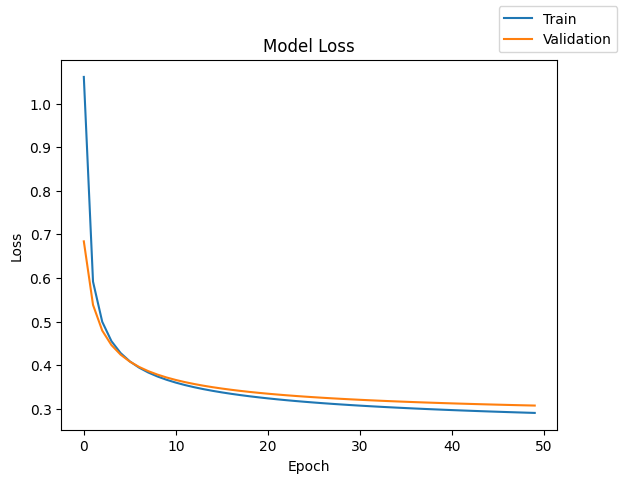

In [74]:
plot(history,'loss')

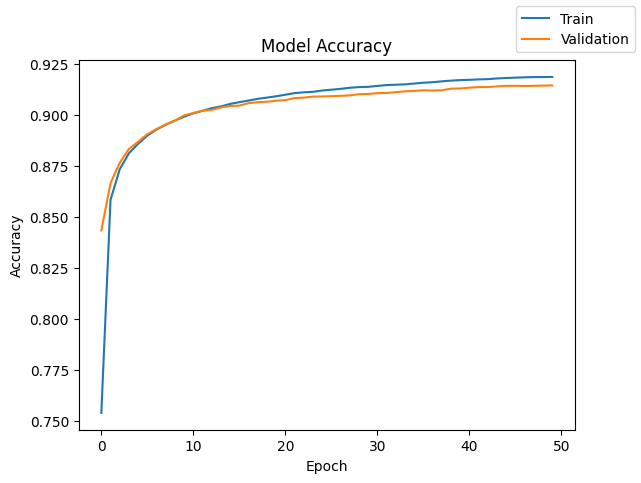

In [75]:
plot(history,'accuracy')

In [76]:
results.loc[4] = [0,'-','-',50,64,history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [77]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,0,-,-,10,50000,2.255868,2.238811,0.15270,0.1628,0.86
1,0,-,-,50,50000,1.927448,1.924149,0.43060,0.4332,3.33
2,0,-,-,10,32,0.327848,0.336322,0.90828,0.9071,5.25
3,0,-,-,50,32,0.272220,0.293814,0.92392,0.9186,25.28
4,0,-,-,50,64,0.290571,0.307456,0.91856,0.9144,15.66


- The time to train the model has reduced by \~50%, and there is a minimal dip in the accuracy (\~1%).

- Note that the model accuracy after one epoch is \~75% now (vs \~80% when we set batch size to 32)

- But, after 10 epochs, the model accuracy is approx. the same (\~90% for batch size 64 vs \~91% for batch size 32)
    - Perhaps there are some noisy points that don't contribute positively even after increasing the batch size for a better weight updates.

- We haven't added a hidden layer to our neural network so far

- Let's try adding a hidden layer

- Also, let's compare vanilla gradient descent and stochastic gradient descent with the updated architecture (1 input + 1 hidden + 1 output).

### Model 5

In [78]:
#clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [79]:
#Initializing the neural network
model = Sequential()
model.add(Dense(64,activation='sigmoid',input_dim = x_train.shape[1]))
model.add(Dense(num_classes, activation = 'softmax'))

In [80]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

- As the network has one hidden and one output layer, both being dense layers, the same is reflected in the model summary

- Let's understand the computation of the total number of parameters in the model
    - Each of the 784 input neurons is connected to the 64 neurons in the hidden layer
    - This gives us 784*64 = 50176 weight parameters and 64 bias parameters, totaling 50240 parameters for the connections between the input and hidden layers.
    - Each of the 64 neurons in the hidden layer is connected to the 10 neurons in the output layer.
    - This gives us 64*10 = 640 weight parameters and 10 bias parameters, totaling 650 parameters for the connections between the hidden and output layers.
    - Thus, the total number of parameters is 50240 + 650 = 50890

In [81]:
batch_size = x_train.shape[0]
epochs = 50
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [82]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end = time.time()

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - accuracy: 0.0939 - loss: 2.4435 - val_accuracy: 0.0954 - val_loss: 2.4353
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.0941 - loss: 2.4358 - val_accuracy: 0.0963 - val_loss: 2.4280
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.0941 - loss: 2.4285

2025-04-06 17:00:15.660079: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-04-06 17:00:15.660341: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.0941 - loss: 2.4285 - val_accuracy: 0.0965 - val_loss: 2.4210
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.0941 - loss: 2.4215 - val_accuracy: 0.0968 - val_loss: 2.4143
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.0945 - loss: 2.4148 - val_accuracy: 0.0971 - val_loss: 2.4080
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.0951 - loss: 2.4085 - val_accuracy: 0.0975 - val_loss: 2.4019
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.0955 - loss: 2.4024 - val_accuracy: 0.0981 - val_loss: 2.3961
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.0959 - loss: 2.3966 - val_accuracy: 0.0988 - val_loss: 2.3906
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.0963 - loss: 2.3910 - val_accuracy: 0.0990 - val_loss: 2.3852
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.0970 - loss: 2.3857 - val_accuracy: 0.0997 - val_loss: 2.3801
Epoch 11/5

In [83]:
print("Time taken in seconds ",end-start)

Time taken in seconds  4.295888900756836


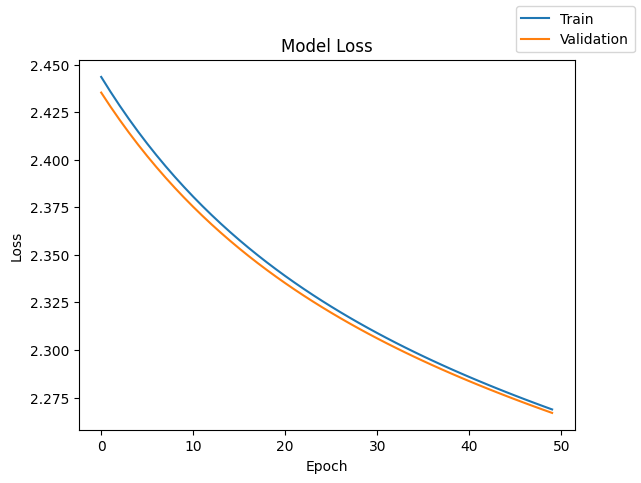

In [84]:
plot(history,'loss')

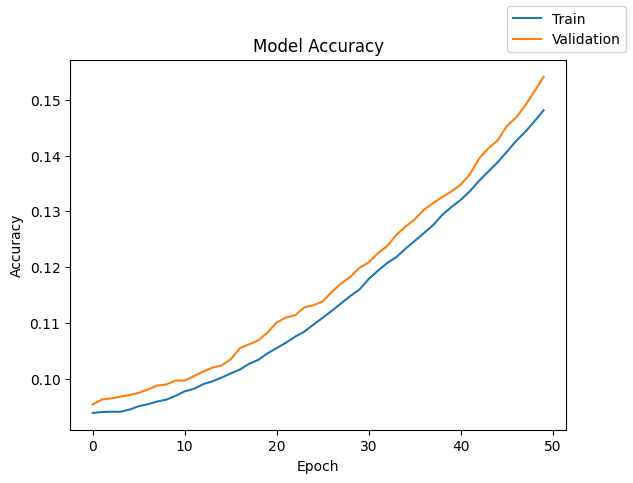

In [85]:
plot(history,'accuracy')

- In this case, the validation loss is always lesser than the training loss.

- Consequently, the validation accuracy is always higher than the training accuracy.

In [86]:
results.loc[5] = [1,64,'sigmoid',50,50000,history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [87]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,0,-,-,10,50000,2.255868,2.238811,0.15270,0.1628,0.86
1,0,-,-,50,50000,1.927448,1.924149,0.43060,0.4332,3.33
2,0,-,-,10,32,0.327848,0.336322,0.90828,0.9071,5.25
3,0,-,-,50,32,0.272220,0.293814,0.92392,0.9186,25.28
4,0,-,-,50,64,0.290571,0.307456,0.91856,0.9144,15.66
5,1,64,sigmoid,50,50000,2.268767,2.266936,0.14812,0.1541,4.30


- From the above results table, it's clear that the model isn't performing well
    - We got better performance with no hidden layers (index 1 vs index 5)

- It seems that just adding a hidden layer isn't improving the model performance.

- Let's check if reducing the batch size to 32 (i.e., implementing stochastic gradient descent) does a better job.

### Model 6

In [88]:
#clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [89]:
#Initializing the neural network
model = Sequential()
model.add(Dense(64,activation='sigmoid',input_dim = x_train.shape[1]))
model.add(Dense(num_classes, activation = 'softmax'))

In [90]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

In [91]:
batch_size = 32
epochs = 50
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [92]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end = time.time()

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 449us/step - accuracy: 0.4898 - loss: 1.9333 - val_accuracy: 0.7794 - val_loss: 1.0945
Epoch 2/50
 150/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - accuracy: 0.7882 - loss: 1.0683

2025-04-06 17:00:20.683079: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-04-06 17:00:20.683339: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 389us/step - accuracy: 0.8082 - loss: 0.9596 - val_accuracy: 0.8469 - val_loss: 0.7089
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 388us/step - accuracy: 0.8553 - loss: 0.6568 - val_accuracy: 0.8694 - val_loss: 0.5616
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 391us/step - accuracy: 0.8756 - loss: 0.5318 - val_accuracy: 0.8817 - val_loss: 0.4856
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 389us/step - accuracy: 0.8853 - loss: 0.4643 - val_accuracy: 0.8885 - val_loss: 0.4394
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 386us/step - accuracy: 0.8911 - loss: 0.4220 - val_accuracy: 0.8931 - val_loss: 0.4083
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 382us/step - accuracy: 0.8963 - loss: 0.3928 - val_accuracy: 0.8966 - val_loss: 0.3859
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 388us/step - accuracy: 0.8998 - loss: 0.3714 - val_accuracy: 0.8997 - val_loss: 0.3688
Epoch 9/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 389us/step - accuracy: 0.9026 - loss: 0.35

In [93]:
print("Time taken in seconds ",end-start)

Time taken in seconds  31.418621063232422


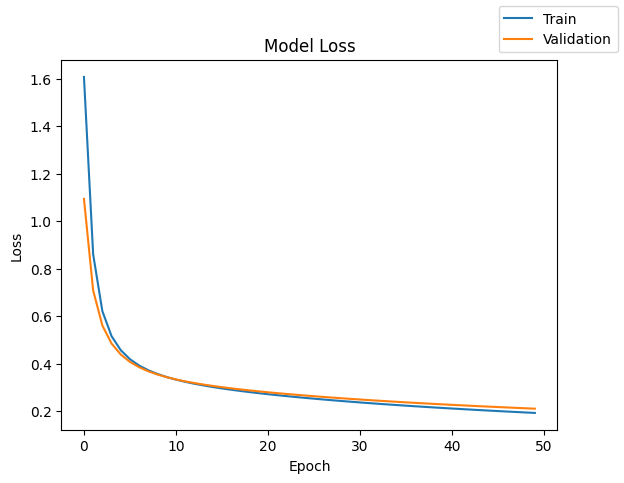

In [94]:
plot(history,'loss')

- The train and validation loss are almost the same from the 10th epoch, and a slight divergence is observed when nearing the 45th epoch.

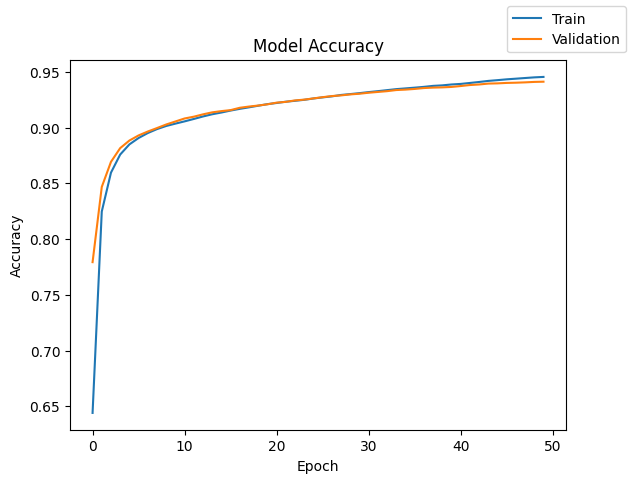

In [95]:
plot(history,'accuracy')

- The train and validation accuracy are almost the same from the 10th epoch, and a slight divergence is observed when nearing the 45th epoch.

In [96]:
results.loc[6] = [1,64,'sigmoid',50,32,history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [97]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,0,-,-,10,50000,2.255868,2.238811,0.15270,0.1628,0.86
1,0,-,-,50,50000,1.927448,1.924149,0.43060,0.4332,3.33
2,0,-,-,10,32,0.327848,0.336322,0.90828,0.9071,5.25
3,0,-,-,50,32,0.272220,0.293814,0.92392,0.9186,25.28
4,0,-,-,50,64,0.290571,0.307456,0.91856,0.9144,15.66
5,1,64,sigmoid,50,50000,2.268767,2.266936,0.14812,0.1541,4.30
6,1,64,sigmoid,50,32,0.193652,0.211530,0.94558,0.9413,31.42


- We have now got the best model so far, with a 2% improvement compared to the previous best (index 3 vs index 6)
    - The time taken is also very similar

- So, we see that adding a hidden layer is helpful, provided we use a smaller batch size.

Now, let's try adding more neurons to the hidden layer.

### Model 7

In [98]:
#clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [99]:
#Initializing the neural network
model = Sequential()
model.add(Dense(128,activation='sigmoid',input_dim = x_train.shape[1]))
model.add(Dense(num_classes, activation = 'softmax'))

In [100]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [101]:
batch_size = 32
epochs = 50
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [102]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end = time.time()

Epoch 1/50
 113/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - accuracy: 0.1502 - loss: 2.2948  

2025-04-06 17:00:51.662599: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-04-06 17:00:51.662887: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 496us/step - accuracy: 0.5277 - loss: 1.8837 - val_accuracy: 0.8068 - val_loss: 0.9877
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 437us/step - accuracy: 0.8288 - loss: 0.8628 - val_accuracy: 0.8547 - val_loss: 0.6424
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 438us/step - accuracy: 0.8641 - loss: 0.5970 - val_accuracy: 0.8736 - val_loss: 0.5197
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 438us/step - accuracy: 0.8787 - loss: 0.4926 - val_accuracy: 0.8819 - val_loss: 0.4573
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 438us/step - accuracy: 0.8873 - loss: 0.4369 - val_accuracy: 0.8880 - val_loss: 0.4196
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 434us/step - accuracy: 0.8931 - loss: 0.4020 - val_accuracy: 0.8930 - val_loss: 0.3941
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 441us/step - accuracy: 0.8971 - loss: 0.3779 - val_accuracy: 0.8975 - val_loss: 0.3756
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 440us/step - accuracy: 0.9001 - loss: 0.36

In [103]:
print("Time taken in seconds ",end-start)

Time taken in seconds  35.84564399719238


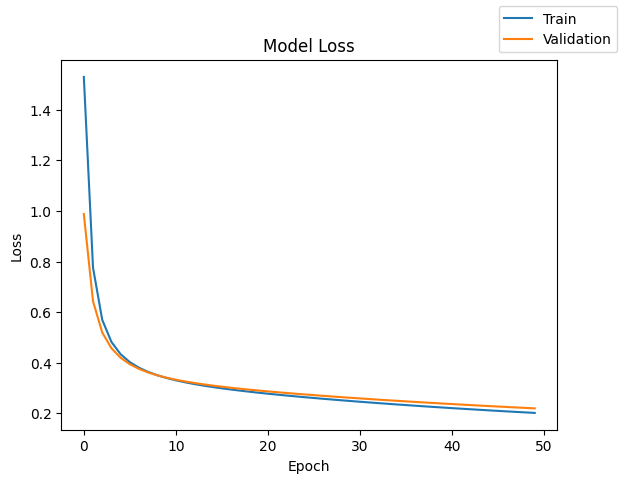

In [104]:
plot(history,'loss')

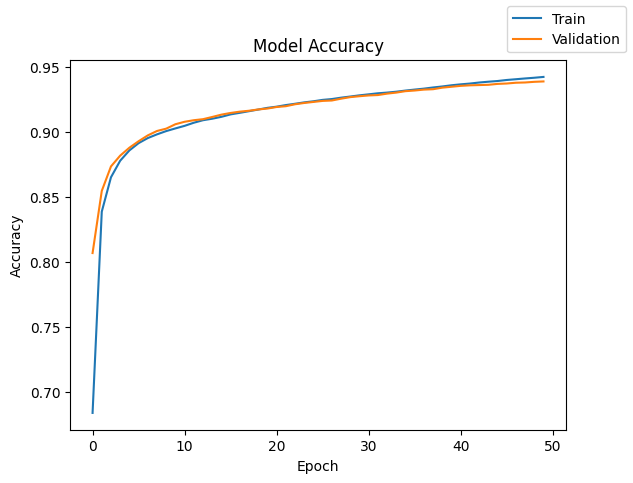

In [105]:
plot(history,'accuracy')

In [106]:
results.loc[7] = [1,128,'sigmoid',50,32,history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [107]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,0,-,-,10,50000,2.255868,2.238811,0.15270,0.1628,0.86
1,0,-,-,50,50000,1.927448,1.924149,0.43060,0.4332,3.33
2,0,-,-,10,32,0.327848,0.336322,0.90828,0.9071,5.25
3,0,-,-,50,32,0.272220,0.293814,0.92392,0.9186,25.28
4,0,-,-,50,64,0.290571,0.307456,0.91856,0.9144,15.66
5,1,64,sigmoid,50,50000,2.268767,2.266936,0.14812,0.1541,4.30
6,1,64,sigmoid,50,32,0.193652,0.211530,0.94558,0.9413,31.42
7,1,128,sigmoid,50,32,0.201664,0.219673,0.94258,0.9391,35.85


- Adding more neurons to the hidden layer hasn't help much
    - This is an observation for this dataset, might not be true for others


Another lever for us to change is the activation function for the hidden layer. Let's experiment with different activation functions.

### Model 8

In [108]:
#clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [109]:
#Initializing the neural network
model = Sequential()
model.add(Dense(128,activation='tanh',input_dim = x_train.shape[1]))
model.add(Dense(num_classes, activation = 'softmax'))

In [110]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [111]:
batch_size = 32
epochs = 50
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [112]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end = time.time()

Epoch 1/50
   1/1563 ━━━━━━━━━━━━━━━━━━━━ 5:40 218ms/step - accuracy: 0.0625 - loss: 2.3719

2025-04-06 17:01:27.741124: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-04-06 17:01:27.741433: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 631us/step - accuracy: 0.7277 - loss: 1.0115 - val_accuracy: 0.8868 - val_loss: 0.4197
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 468us/step - accuracy: 0.8956 - loss: 0.3833 - val_accuracy: 0.9015 - val_loss: 0.3532
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 477us/step - accuracy: 0.9077 - loss: 0.3288 - val_accuracy: 0.9084 - val_loss: 0.3238
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 651us/step - accuracy: 0.9149 - loss: 0.3016 - val_accuracy: 0.9139 - val_loss: 0.3046
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 571us/step - accuracy: 0.9197 - loss: 0.2829 - val_accuracy: 0.9184 - val_loss: 0.2898
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 550us/step - accuracy: 0.9236 - loss: 0.2677 - val_accuracy: 0.9221 - val_loss: 0.2770
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 545us/step - accuracy: 0.9279 - loss: 0.2545 - val_accuracy: 0.9250 - val_loss: 0.2656
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 556us/step - accuracy: 0.9315 - loss: 0.24

In [113]:
print("Time taken in seconds ",end-start)

Time taken in seconds  44.17059874534607


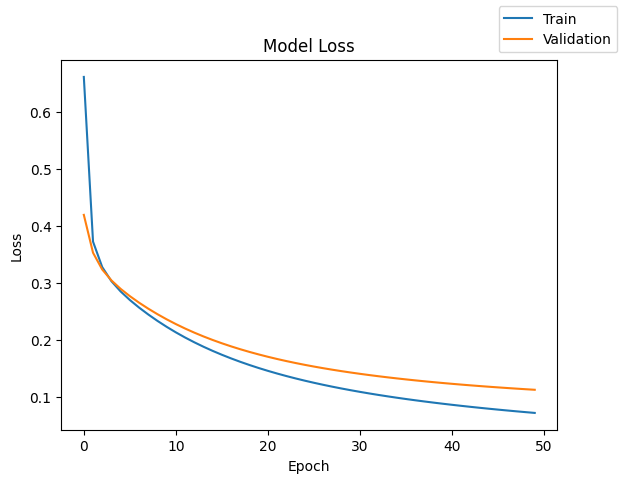

In [114]:
plot(history,'loss')

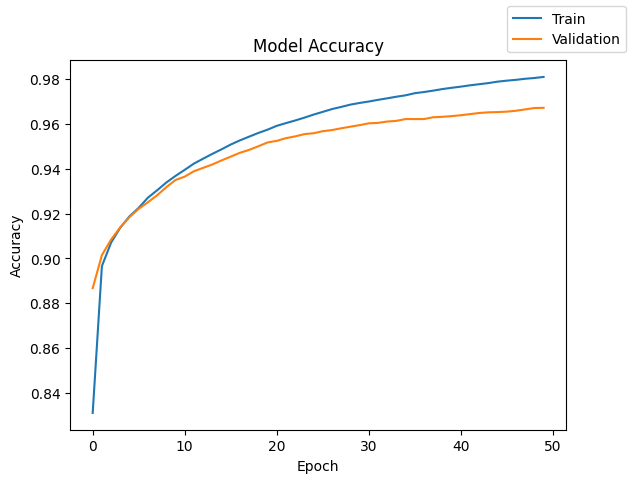

In [115]:
plot(history,'accuracy')

In [116]:
results.loc[8] = [1,128,'tanh',50,32,history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [117]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,0,-,-,10,50000,2.255868,2.238811,0.15270,0.1628,0.86
1,0,-,-,50,50000,1.927448,1.924149,0.43060,0.4332,3.33
2,0,-,-,10,32,0.327848,0.336322,0.90828,0.9071,5.25
3,0,-,-,50,32,0.272220,0.293814,0.92392,0.9186,25.28
4,0,-,-,50,64,0.290571,0.307456,0.91856,0.9144,15.66
5,1,64,sigmoid,50,50000,2.268767,2.266936,0.14812,0.1541,4.30
6,1,64,sigmoid,50,32,0.193652,0.211530,0.94558,0.9413,31.42
7,1,128,sigmoid,50,32,0.201664,0.219673,0.94258,0.9391,35.85
8,1,128,tanh,50,32,0.072019,0.112645,0.98074,0.9670,44.17


- With **tanh** as the activation function, we got a 4% improvement with the same time spent.

- Hence, it seems that the choice of activation function matters.

### Model 9

In [118]:
#clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [119]:
#Initializing the neural network
model = Sequential()
model.add(Dense(128,activation='relu',input_dim = x_train.shape[1]))
model.add(Dense(num_classes, activation = 'softmax'))

In [120]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [121]:
batch_size = 32
epochs = 50
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [122]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end = time.time()

Epoch 1/50
 100/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - accuracy: 0.2375 - loss: 2.1956  

2025-04-06 17:02:12.180026: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-04-06 17:02:12.180330: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 584us/step - accuracy: 0.6949 - loss: 1.1619 - val_accuracy: 0.8866 - val_loss: 0.4117
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 553us/step - accuracy: 0.8983 - loss: 0.3724 - val_accuracy: 0.9059 - val_loss: 0.3339
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 565us/step - accuracy: 0.9135 - loss: 0.3095 - val_accuracy: 0.9165 - val_loss: 0.2987
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 554us/step - accuracy: 0.9227 - loss: 0.2771 - val_accuracy: 0.9242 - val_loss: 0.2746
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 582us/step - accuracy: 0.9283 - loss: 0.2535 - val_accuracy: 0.9305 - val_loss: 0.2558
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 572us/step - accuracy: 0.9338 - loss: 0.2345 - val_accuracy: 0.9336 - val_loss: 0.2401
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 628us/step - accuracy: 0.9386 - loss: 0.2184 - val_accuracy: 0.9383 - val_loss: 0.2269
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 542us/step - accuracy: 0.9428 - loss: 0.20

In [123]:
print("Time taken in seconds ",end-start)

Time taken in seconds  44.134894132614136


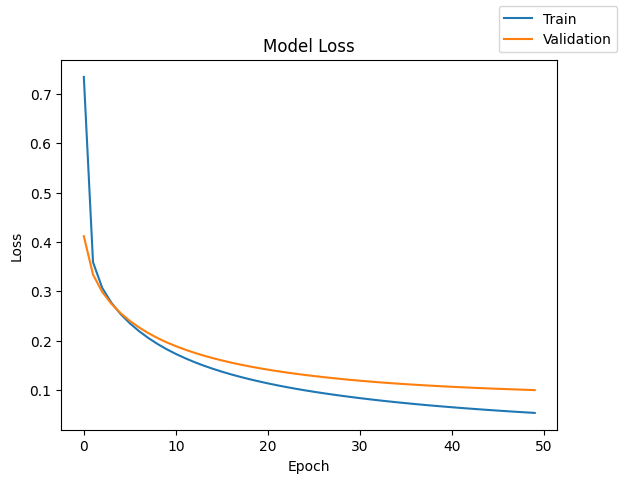

In [124]:
plot(history,'loss')

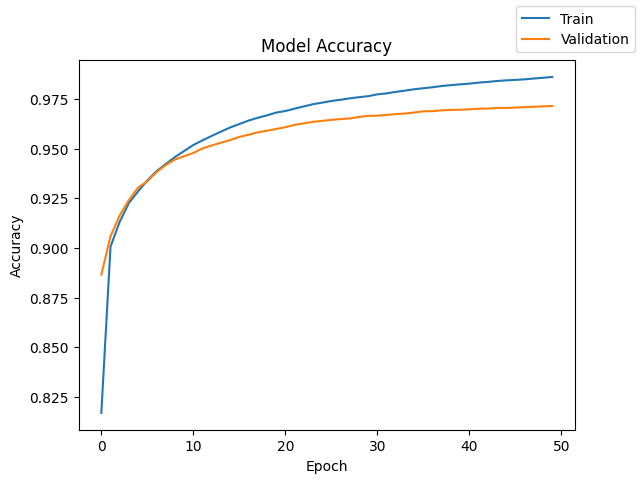

In [125]:
plot(history,'accuracy')

In [126]:
results.loc[9] = [1,128,'relu',50,32,history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [127]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,0,-,-,10,50000,2.255868,2.238811,0.15270,0.1628,0.86
1,0,-,-,50,50000,1.927448,1.924149,0.43060,0.4332,3.33
2,0,-,-,10,32,0.327848,0.336322,0.90828,0.9071,5.25
3,0,-,-,50,32,0.272220,0.293814,0.92392,0.9186,25.28
4,0,-,-,50,64,0.290571,0.307456,0.91856,0.9144,15.66
5,1,64,sigmoid,50,50000,2.268767,2.266936,0.14812,0.1541,4.30
6,1,64,sigmoid,50,32,0.193652,0.211530,0.94558,0.9413,31.42
7,1,128,sigmoid,50,32,0.201664,0.219673,0.94258,0.9391,35.85
8,1,128,tanh,50,32,0.072019,0.112645,0.98074,0.9670,44.17
9,1,128,relu,50,32,0.053719,0.099975,0.98624,0.9716,44.13


- With **relu** as the activation function, the performance improved slightly (~0.6%)

- Experimenting with different activation functions has helped

- This shows that activation functions is indeed a lever that one can change to try and improve  the overall model performance.
    - In our case, out of tanh, relu, and sigmoid, tanh and relu perform better than sigmoid

Now, let's try adding one more hidden layer to our neural network. We'll choose relu and tanh as the activation functions for it.

### Model 10

In [128]:
#clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [129]:
#Initializing the neural network
model = Sequential()
model.add(Dense(128,activation='relu',input_dim = x_train.shape[1]))
model.add(Dense(64,activation='tanh'))
model.add(Dense(num_classes, activation = 'softmax'))

In [130]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [131]:
batch_size = 32
epochs = 50
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [132]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end = time.time()

Epoch 1/50
  91/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - accuracy: 0.2253 - loss: 2.2113  

2025-04-06 17:02:56.583540: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-04-06 17:02:56.583864: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 616us/step - accuracy: 0.7050 - loss: 1.1124 - val_accuracy: 0.9010 - val_loss: 0.3674
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 557us/step - accuracy: 0.9094 - loss: 0.3298 - val_accuracy: 0.9208 - val_loss: 0.2829
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 570us/step - accuracy: 0.9271 - loss: 0.2599 - val_accuracy: 0.9314 - val_loss: 0.2437
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 556us/step - accuracy: 0.9370 - loss: 0.2229 - val_accuracy: 0.9393 - val_loss: 0.2181
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 585us/step - accuracy: 0.9444 - loss: 0.1973 - val_accuracy: 0.9436 - val_loss: 0.1991
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 554us/step - accuracy: 0.9498 - loss: 0.1776 - val_accuracy: 0.9466 - val_loss: 0.1843
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 569us/step - accuracy: 0.9539 - loss: 0.1617 - val_accuracy: 0.9503 - val_loss: 0.1722
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 629us/step - accuracy: 0.9583 - loss: 0.14

In [133]:
print("Time taken in seconds ",end-start)

Time taken in seconds  45.558615922927856


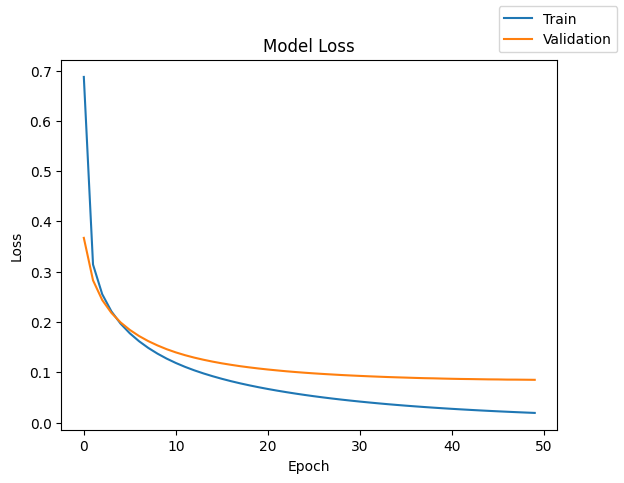

In [134]:
plot(history,'loss')

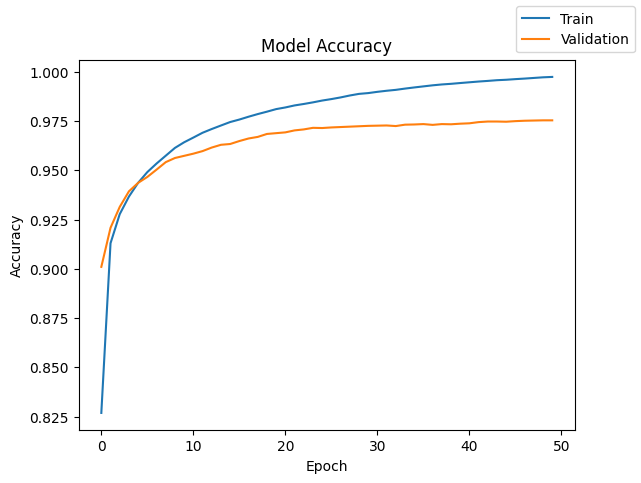

In [135]:
plot(history,'accuracy')

In [136]:
results.loc[10] = [2,[128,64],['relu','tanh'],50,32,history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [137]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,0,-,-,10,50000,2.255868,2.238811,0.15270,0.1628,0.86
1,0,-,-,50,50000,1.927448,1.924149,0.43060,0.4332,3.33
2,0,-,-,10,32,0.327848,0.336322,0.90828,0.9071,5.25
3,0,-,-,50,32,0.272220,0.293814,0.92392,0.9186,25.28
4,0,-,-,50,64,0.290571,0.307456,0.91856,0.9144,15.66
5,1,64,sigmoid,50,50000,2.268767,2.266936,0.14812,0.1541,4.30
6,1,64,sigmoid,50,32,0.193652,0.211530,0.94558,0.9413,31.42
7,1,128,sigmoid,50,32,0.201664,0.219673,0.94258,0.9391,35.85
8,1,128,tanh,50,32,0.072019,0.112645,0.98074,0.9670,44.17
9,1,128,relu,50,32,0.053719,0.099975,0.98624,0.9716,44.13


- Adding another layer with the best activation has slightly improved (~1%) the accuracy of the model.

- This increase is not only due to the addition of a new hidden layer but collectively depends on a set of carefully chosen hyperparameters (batch size, hidden layer activation, # hidden layers, # neurons in the hidden layer).

- The order of the activations of the hidden layers might matter.
- We have tried using relu activation for first hidden layer and tanh activation for the second hidden layer
- Let's try reversing the order

### Model 11

In [138]:
#clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [139]:
#Initializing the neural network
model = Sequential()
model.add(Dense(128,activation='tanh',input_dim = x_train.shape[1]))
model.add(Dense(64,activation='relu'))
model.add(Dense(num_classes, activation = 'softmax'))

In [140]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [141]:
batch_size = 32
epochs = 50
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [142]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end = time.time()

Epoch 1/50
  92/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - accuracy: 0.2333 - loss: 2.2112  

2025-04-06 17:03:42.416889: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-04-06 17:03:42.417327: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 609us/step - accuracy: 0.7087 - loss: 1.0944 - val_accuracy: 0.8939 - val_loss: 0.3735
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 570us/step - accuracy: 0.9050 - loss: 0.3345 - val_accuracy: 0.9131 - val_loss: 0.3002
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 555us/step - accuracy: 0.9186 - loss: 0.2751 - val_accuracy: 0.9227 - val_loss: 0.2647
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 560us/step - accuracy: 0.9299 - loss: 0.2421 - val_accuracy: 0.9301 - val_loss: 0.2402
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 549us/step - accuracy: 0.9368 - loss: 0.2178 - val_accuracy: 0.9364 - val_loss: 0.2213
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 572us/step - accuracy: 0.9436 - loss: 0.1983 - val_accuracy: 0.9406 - val_loss: 0.2063
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 550us/step - accuracy: 0.9477 - loss: 0.1820 - val_accuracy: 0.9456 - val_loss: 0.1935
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 563us/step - accuracy: 0.9517 - loss: 0.16

In [143]:
print("Time taken in seconds ",end-start)

Time taken in seconds  45.89980101585388


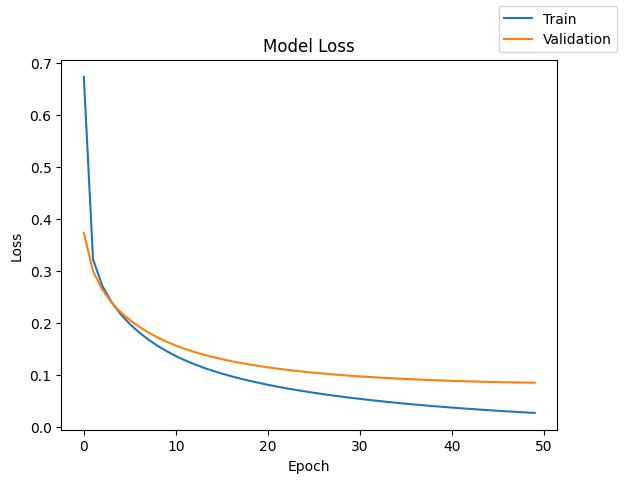

In [144]:
plot(history,'loss')

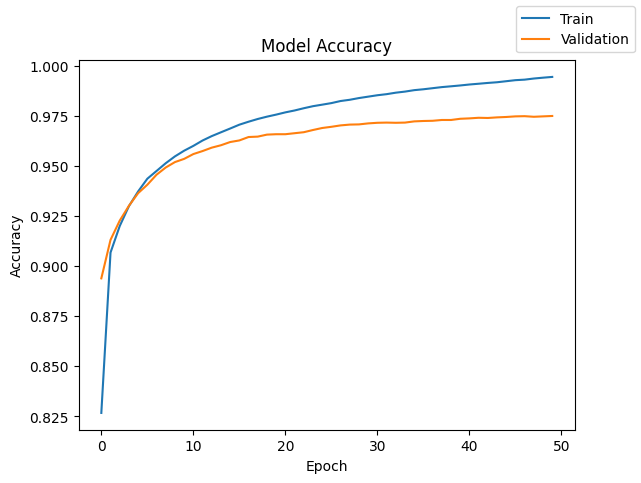

In [145]:
plot(history,'accuracy')

In [146]:
results.loc[11] = [2,[128,64],['tanh','relu'],50,32,history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [147]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,0,-,-,10,50000,2.255868,2.238811,0.15270,0.1628,0.86
1,0,-,-,50,50000,1.927448,1.924149,0.43060,0.4332,3.33
2,0,-,-,10,32,0.327848,0.336322,0.90828,0.9071,5.25
3,0,-,-,50,32,0.272220,0.293814,0.92392,0.9186,25.28
4,0,-,-,50,64,0.290571,0.307456,0.91856,0.9144,15.66
5,1,64,sigmoid,50,50000,2.268767,2.266936,0.14812,0.1541,4.30
6,1,64,sigmoid,50,32,0.193652,0.211530,0.94558,0.9413,31.42
7,1,128,sigmoid,50,32,0.201664,0.219673,0.94258,0.9391,35.85
8,1,128,tanh,50,32,0.072019,0.112645,0.98074,0.9670,44.17
9,1,128,relu,50,32,0.053719,0.099975,0.98624,0.9716,44.13


- The change in the order of activation has not yielded much different results

Let's try adding one more hidden layer with the best activation function (relu) we've seen.

### Model 12

In [148]:
#clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [149]:
#Initializing the neural network
model = Sequential()
model.add(Dense(128,activation='relu',input_dim = x_train.shape[1]))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(num_classes, activation = 'softmax'))

In [150]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

In [151]:
batch_size = 32
epochs = 50
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [152]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end = time.time()

Epoch 1/50
  84/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - accuracy: 0.1560 - loss: 2.2785  

2025-04-06 17:04:28.585499: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-04-06 17:04:28.585827: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 644us/step - accuracy: 0.6288 - loss: 1.2805 - val_accuracy: 0.8951 - val_loss: 0.3724
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 565us/step - accuracy: 0.9080 - loss: 0.3177 - val_accuracy: 0.9214 - val_loss: 0.2803
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 571us/step - accuracy: 0.9283 - loss: 0.2493 - val_accuracy: 0.9368 - val_loss: 0.2318
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 574us/step - accuracy: 0.9410 - loss: 0.2060 - val_accuracy: 0.9432 - val_loss: 0.2006
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 554us/step - accuracy: 0.9511 - loss: 0.1751 - val_accuracy: 0.9491 - val_loss: 0.1800
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 565us/step - accuracy: 0.9568 - loss: 0.1520 - val_accuracy: 0.9524 - val_loss: 0.1649
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 570us/step - accuracy: 0.9622 - loss: 0.1337 - val_accuracy: 0.9548 - val_loss: 0.1531
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 564us/step - accuracy: 0.9662 - loss: 0.11

In [153]:
print("Time taken in seconds ",end-start)

Time taken in seconds  45.77075982093811


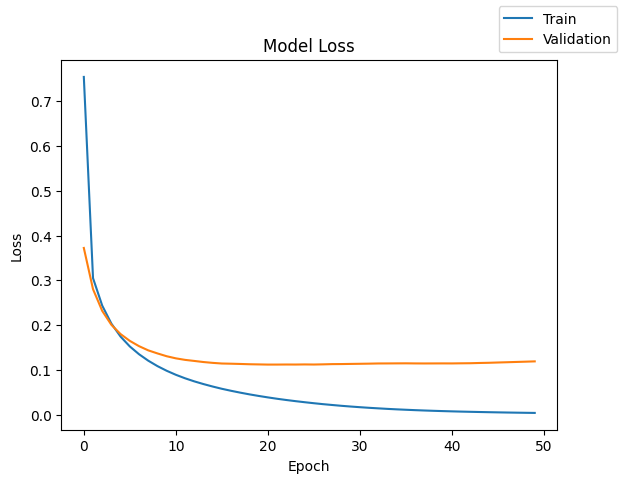

In [154]:
plot(history,'loss')

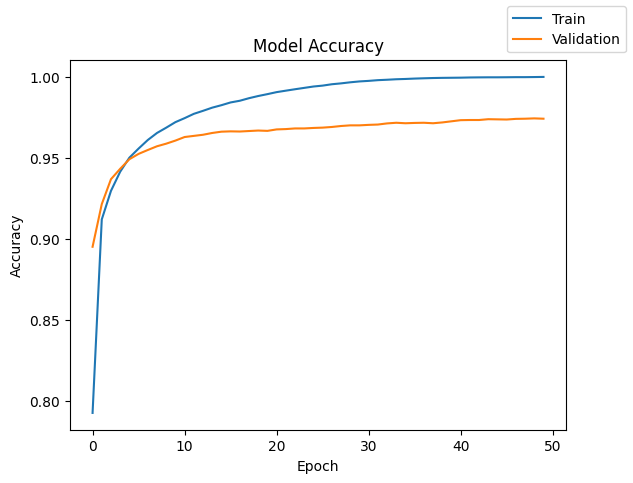

In [155]:
plot(history,'accuracy')

In [156]:
results.loc[12] = [3,[128,64,32],['relu','relu','relu'],50,32,history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [157]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,0,-,-,10,50000,2.255868,2.238811,0.15270,0.1628,0.86
1,0,-,-,50,50000,1.927448,1.924149,0.43060,0.4332,3.33
2,0,-,-,10,32,0.327848,0.336322,0.90828,0.9071,5.25
3,0,-,-,50,32,0.272220,0.293814,0.92392,0.9186,25.28
4,0,-,-,50,64,0.290571,0.307456,0.91856,0.9144,15.66
5,1,64,sigmoid,50,50000,2.268767,2.266936,0.14812,0.1541,4.30
6,1,64,sigmoid,50,32,0.193652,0.211530,0.94558,0.9413,31.42
7,1,128,sigmoid,50,32,0.201664,0.219673,0.94258,0.9391,35.85
8,1,128,tanh,50,32,0.072019,0.112645,0.98074,0.9670,44.17
9,1,128,relu,50,32,0.053719,0.099975,0.98624,0.9716,44.13


- The model's performance improved slightly (~0.5%)

Let's increase the number of epochs further to see what happens.

### Model 13

In [158]:
#clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [159]:
#Initializing the neural network
model = Sequential()
model.add(Dense(128,activation='relu',input_dim = x_train.shape[1]))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(num_classes, activation = 'softmax'))

In [160]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

In [161]:
batch_size = 32
epochs = 100
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [162]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end = time.time()

Epoch 1/100
  92/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - accuracy: 0.1423 - loss: 2.2554  

2025-04-06 17:05:14.639132: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-04-06 17:05:14.639663: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 646us/step - accuracy: 0.6293 - loss: 1.2147 - val_accuracy: 0.8989 - val_loss: 0.3519
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 578us/step - accuracy: 0.9107 - loss: 0.3077 - val_accuracy: 0.9259 - val_loss: 0.2639
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 583us/step - accuracy: 0.9307 - loss: 0.2357 - val_accuracy: 0.9380 - val_loss: 0.2181
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 601us/step - accuracy: 0.9448 - loss: 0.1926 - val_accuracy: 0.9453 - val_loss: 0.1890
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 588us/step - accuracy: 0.9538 - loss: 0.1630 - val_accuracy: 0.9506 - val_loss: 0.1704
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 579us/step - accuracy: 0.9592 - loss: 0.1413 - val_accuracy: 0.9546 - val_loss: 0.1571
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 587us/step - accuracy: 0.9648 - loss: 0.1247 - val_accuracy: 0.9585 - val_loss: 0.1464
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 607us/step - accuracy: 0.9686 - los

In [163]:
print("Time taken in seconds ",end-start)

Time taken in seconds  93.8748710155487


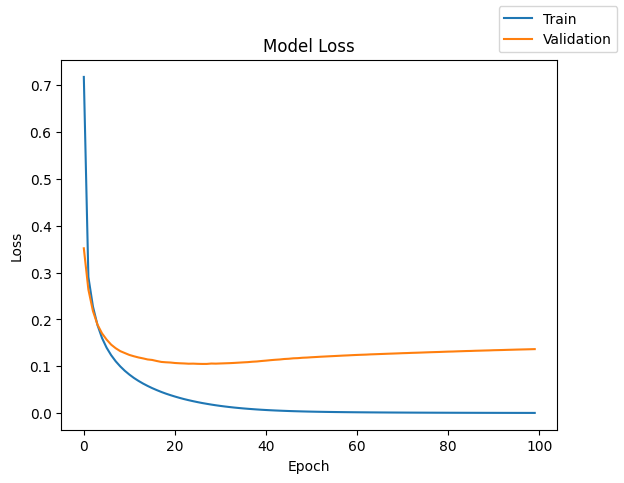

In [164]:
plot(history,'loss')

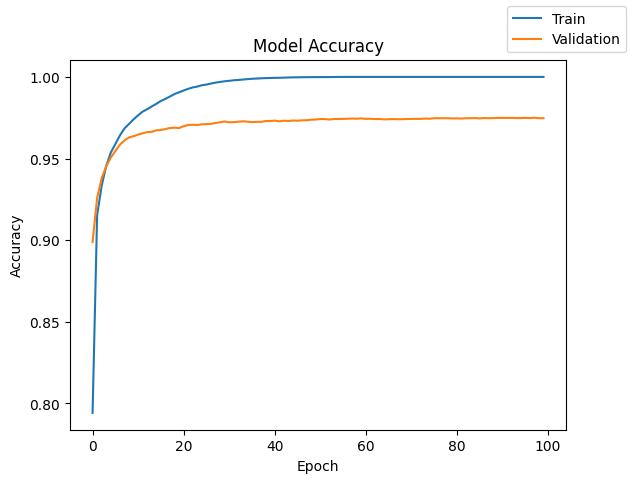

In [165]:
plot(history,'accuracy')

In [166]:
results.loc[13] = [3,[128,64,32],['relu','relu','relu'],100,32,history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [167]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,0,-,-,10,50000,2.255868,2.238811,0.15270,0.1628,0.86
1,0,-,-,50,50000,1.927448,1.924149,0.43060,0.4332,3.33
2,0,-,-,10,32,0.327848,0.336322,0.90828,0.9071,5.25
3,0,-,-,50,32,0.272220,0.293814,0.92392,0.9186,25.28
4,0,-,-,50,64,0.290571,0.307456,0.91856,0.9144,15.66
5,1,64,sigmoid,50,50000,2.268767,2.266936,0.14812,0.1541,4.30
6,1,64,sigmoid,50,32,0.193652,0.211530,0.94558,0.9413,31.42
7,1,128,sigmoid,50,32,0.201664,0.219673,0.94258,0.9391,35.85
8,1,128,tanh,50,32,0.072019,0.112645,0.98074,0.9670,44.17
9,1,128,relu,50,32,0.053719,0.099975,0.98624,0.9716,44.13


- The training accuracy has reached it's peak (100% accurate)

- The validation accuracy doesn't appear to have changed much in the last few models we built
    - The validation accuracy seems to be in the range [0.9700 - 0.9760] in the last few models

- The time taken for 100 epochs, though, is almost double than before, which is expected.

## Conclusions

1. **Baseline Model:**
   - A baseline model with no hidden layers, using vanilla Gradient Descent, and run with 10 epochs yielded a low accuracy (less than 20%)

2. **Effect of Increasing Epochs:**
   - Increasing the number of epochs results in the model being trained for longer, resulting in improved training accuracy
   - It does take a longer time for execution, which is expected
   - It is important to note that while running more epochs improves training accuracy, it might not always yield a better validation accuracy. So, running a model for more epochs can lead to an overfit model

3. **Gradient Descent (GD) vs Stochastic Gradient Descent (SGD):**
   - Implementing Stochastic Gradient Descent involves using smaller batches of data to update the model parameters, which resulted in an improved rate of learning for the model. Consequently, we witnessed a largely better model accuracy (~90%) in fewer epochs compared to the baseline model

4. **Effect of Batch Size:**
   - Using a batch size of 32 or 64 did not result in a huge change in model accuracy compared to the use of the entire data as one batch.
   - As long as we choose a small batch size (like 32 or 64), we can expect an overall better model performance

5. **Effect of Adding a Hidden Layer:**
   - Adding a hidden layer to the baseline model did not improve the model performance largely, but using SGD along with the addition of a hidden layer yielded hugely better results than the baseline model

6. **Effect of Changing the Hidden Layer Activation Function:**
   - Changing the hidden layer activation has a notable effect on the model performance, with tanh and relu activations yielding better results than sigmoid activation

7. **Effect of Additional Hidden Layers:**
   - Adding more hidden layers (while using SGD and relu/tanh activation) yields slightly better performance than a model with only one hidden layer

**Note**: While the above points offer certain directions regarding how to update the configuration of a neural network for better results, one needs to experiment with different configurations and find the best model through trial and error in real-world scenarios.

<font size=6 color='blue'>Power Ahead</font>
___